In [2]:
!pip install scikit_posthocs
!pip install imblearn
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 832 kB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import sys
import os
import time
import warnings
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import svm
import scikit_posthocs as sp
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve,auc, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from statistics import mean
from scipy.stats import friedmanchisquare
from sklearn.model_selection import cross_val_score
%matplotlib inline
warnings.filterwarnings('always')
warnings.simplefilter("always")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Data for experiments

cols=['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','AScore',
'Cscore','Impulsive','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke',
'Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
df=pd.read_csv(r'/content/drive/MyDrive/ML_A2_Dataset/drug_consumption.data',names=cols,delimiter=",")

df2=df.apply(lambda x: x.replace({'CL0':'1', 'CL1':'1','CL2':'0','CL3':'0','CL4':'0', 'CL5':'0','CL6':'0'}, regex=True))
df2=df2.drop(['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA'], axis=1)
print(df2)

df_heart=pd.read_csv('/content/drive/MyDrive/ML_A2_Dataset/heart_cleveland_upload.csv',delimiter=",")
print(df_heart)
lab_columns=['dur', 'wage1', 'wage2', 'wage3', 'cola', 'hours', 'pension', 'stby_pay', 'shift_diff', 'educ_allw', 'holidays','vacation',
 'lngtrm_disabil', 'dntl_ins', 'bereavement', 'empl_hplan', 'target']
df_labor=pd.read_csv('/content/drive/MyDrive/ML_A2_Dataset/labor-neg.data', names=lab_columns, header=None, delimiter=",")
df_labor_test=pd.read_csv('/content/drive/MyDrive/ML_A2_Dataset/labor-neg.test', names=lab_columns, header=None, delimiter=",")
f = [ df_labor, df_labor_test ]
df_labor.info()
df_labor_test.info()
df_labor_test_train = pd.concat(f,ignore_index=True)
print(df_labor_test_train)
df_labor_test_train.info()

        ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0        1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3        4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4        5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
...    ...      ...      ...        ...      ...        ...      ...      ...   
1880  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1881  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1882  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1883  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1884  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.12700   

       Oscore   AScore   Cs

Heart Data Correlation matrix


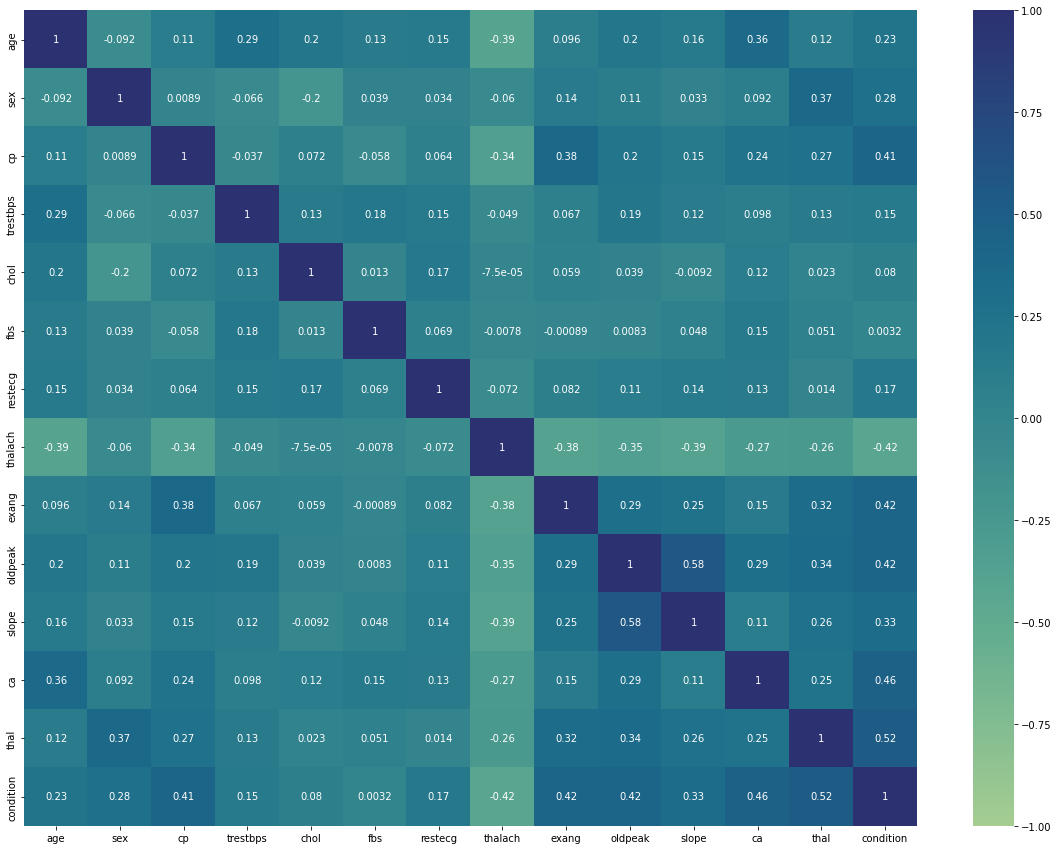

In [ ]:
corr = df_heart.corr()
plt.figure(figsize=(20,15))
print("Heart Data Correlation matrix")
sns.heatmap(corr, annot=True, vmin=-1,center=0,cmap="crest")

In [5]:
X_d=df2.drop(['Heroin'], axis=1)
y_d=df2['Heroin']

In [6]:
oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(sampling_strategy=1)

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X_d)
print(type(X))
X_d=pd.DataFrame(X, columns=X_d.columns)
print(X_d)

<class 'numpy.ndarray'>
           ID       Age  Gender  Education   Country  Ethnicity    Nscore  \
0     0.00000  0.409137     1.0   0.537681  1.000000   0.409061  0.560562   
1     0.00053  0.246475     0.0   1.000000  1.000000   0.262143  0.413474   
2     0.00106  0.409137     0.0   0.537681  1.000000   0.262143  0.444788   
3     0.00159  0.000000     1.0   0.814329  1.000000   0.262143  0.492045   
4     0.00212  0.409137     1.0   1.000000  1.000000   0.262143  0.623275   
...       ...       ...     ...        ...       ...        ...       ...   
1880  0.99788  0.000000     1.0   0.412820  0.000000   0.262143  0.336890   
1881  0.99841  0.000000     0.0   0.412820  0.000000   0.262143  0.477550   
1882  0.99894  0.246475     1.0   0.653938  0.000000   0.262143  0.682246   
1883  0.99947  0.000000     1.0   0.412820  0.000000   0.262143  0.649318   
1884  1.00000  0.000000     0.0   0.412820  0.510396   0.262143  0.444788   

        Escore    Oscore    AScore    Cscore  Impul

In [8]:
#feature selection :::: D data
col_names=X_d.columns
fval_selector=SelectKBest(f_classif,k=6)
x_kbest_d=fval_selector.fit_transform(X_d,y_d)
x_kbest_d.size
x_kbest_d.shape
filter = fval_selector.get_support()
X_d_inputs = pd.DataFrame(x_kbest_d, columns=col_names[filter])
print(X_d_inputs)
print(y_d)

       Country    Nscore    Oscore    AScore  Impulsive        SS
0     1.000000  0.560562  0.435690  0.367654   0.428474  0.224398
1     1.000000  0.413474  0.762567  0.609827   0.337920  0.465658
2     1.000000  0.444788  0.392939  0.266061   0.215401  0.619957
3     1.000000  0.492045  0.527023  0.585213   0.215401  0.224398
4     1.000000  0.623275  0.456995  0.456454   0.428474  0.465658
...        ...       ...       ...       ...        ...       ...
1880  0.000000  0.336890  0.835399  0.609827   0.629735  1.000000
1881  0.000000  0.477550  0.624600  0.609827   0.629735  0.710933
1882  0.000000  0.682246  0.323599  0.244253   0.565343  0.388117
1883  0.000000  0.649318  0.577652  0.266061   0.705068  0.825752
1884  0.510396  0.444788  0.798385  0.660789   0.629735  0.825752

[1885 rows x 6 columns]
0       1
1       1
2       1
3       1
4       1
       ..
1880    1
1881    1
1882    1
1883    1
1884    1
Name: Heroin, Length: 1885, dtype: object


In [9]:
df_heart.info()
df_heart=df_heart.fillna(0)
df_heart_obj=df_heart.loc[:, df_heart.dtypes == np.object]
cat_col_names=df_heart_obj.columns
lab_enc = LabelEncoder()

for feat in df_heart_obj:
    df_heart[feat] = lab_enc.fit_transform(df_heart[feat].astype(str))

X_heart=df_heart.drop(['condition'],axis=1)
df_heart

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [10]:
# feat scaling :::: heart data 
scaler_mm = MinMaxScaler()
scaled_data = scaler_mm.fit_transform(X_heart)
data_heart=pd.DataFrame(scaled_data,columns = X_heart.columns)
print(data_heart)
y_heart=df_heart['condition']
print(y_heart)

          age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    0.833333  1.0  0.0  0.622642  0.246575  1.0      1.0  0.458015    0.0   
1    0.833333  0.0  0.0  0.433962  0.257991  0.0      0.0  0.610687    0.0   
2    0.770833  0.0  0.0  0.528302  0.228311  0.0      0.0  0.328244    0.0   
3    0.750000  1.0  0.0  0.415094  0.356164  1.0      1.0  0.786260    0.0   
4    0.729167  1.0  0.0  0.150943  0.194064  0.0      1.0  0.557252    1.0   
..        ...  ...  ...       ...       ...  ...      ...       ...    ...   
292  0.229167  1.0  1.0  0.547170  0.221461  0.0      0.0  0.839695    0.0   
293  0.208333  1.0  1.0  0.226415  0.212329  0.0      0.0  0.526718    0.0   
294  0.125000  1.0  1.0  0.245283  0.164384  0.0      0.0  0.450382    1.0   
295  0.125000  0.0  1.0  0.415094  0.130137  0.0      0.0  0.847328    0.0   
296  0.125000  1.0  1.0  0.301887  0.356164  0.0      1.0  0.648855    1.0   

      oldpeak  slope        ca  thal  
0    0.016129    0.5  0.

In [11]:
#feature selection :::: heart data
col_names=data_heart.columns
fval_selector=SelectKBest(f_classif,k=8)
x_kbest=fval_selector.fit_transform(data_heart,y_heart)
x_kbest.size
x_kbest.shape
filter = fval_selector.get_support()
X_heart_inputs = pd.DataFrame(x_kbest, columns=col_names[filter])
print(X_heart_inputs)
print(y_heart)

     sex   cp   thalach  exang   oldpeak  slope        ca  thal
0    1.0  0.0  0.458015    0.0  0.016129    0.5  0.333333   0.0
1    0.0  0.0  0.610687    0.0  0.290323    0.0  0.666667   0.0
2    0.0  0.0  0.328244    0.0  0.419355    1.0  0.000000   0.0
3    1.0  0.0  0.786260    0.0  0.225806    0.5  0.333333   0.0
4    1.0  0.0  0.557252    1.0  0.290323    0.5  0.000000   0.0
..   ...  ...       ...    ...       ...    ...       ...   ...
292  1.0  1.0  0.839695    0.0  0.000000    0.0  0.000000   1.0
293  1.0  1.0  0.526718    0.0  0.193548    0.5  0.000000   1.0
294  1.0  1.0  0.450382    1.0  0.258065    0.5  0.000000   1.0
295  0.0  1.0  0.847328    0.0  0.225806    0.0  0.000000   0.0
296  1.0  1.0  0.648855    1.0  0.000000    0.0  0.000000   1.0

[297 rows x 8 columns]
0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64


In [15]:
# data preprocessing and data scaling :::: Labor Data

df_labor_test_train['dur'].replace(to_replace='?', value= '0', inplace= True)
df_labor_test_train['wage1'].replace(to_replace='?', value= '0', inplace= True)
df_labor_test_train['wage2'].replace(to_replace='?', value= '0', inplace= True)
df_labor_test_train['wage3'].replace(to_replace='?', value= '0', inplace= True)
df_labor_test_train['hours'].replace(to_replace='?', value= '0', inplace= True)
df_labor_test_train['stby_pay'].replace(to_replace='?', value= '0', inplace= True)
df_labor_test_train['shift_diff'].replace(to_replace='?', value= '0', inplace= True)
df_labor_test_train['holidays'].replace(to_replace='?', value= '0', inplace= True)
convert_dict = {'dur': int,
                'wage1': float,
                'wage2':float,
                'wage3':float,
                'hours':int,
                'stby_pay': int,
                'shift_diff': int,
                'holidays': int         
                }
df_labor_test_train = df_labor_test_train.astype(convert_dict)
print(df_labor_test_train.dtypes)
df_labor_test_train.info()
print(df_labor_test_train)

dur                 int64
wage1             float64
wage2             float64
wage3             float64
cola               object
hours               int64
pension            object
stby_pay            int64
shift_diff          int64
educ_allw          object
holidays            int64
vacation           object
lngtrm_disabil     object
dntl_ins           object
bereavement        object
empl_hplan         object
target             object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dur             57 non-null     int64  
 1   wage1           57 non-null     float64
 2   wage2           57 non-null     float64
 3   wage3           57 non-null     float64
 4   cola            57 non-null     object 
 5   hours           57 non-null     int64  
 6   pension         57 non-null     object 
 7   stby_pay        57 non-null    

In [16]:
# feature encoding :: labor data 
encoded_labor=OneHotEncoder(cols=['cola','pension','educ_allw','vacation','lngtrm_disabil',	'dntl_ins',	'bereavement','empl_hplan']).fit(df_labor_test_train).transform(df_labor_test_train)
encoded_labor
encoded_labor['target'].replace(to_replace='good', value= '1', inplace= True)
encoded_labor['target'].replace(to_replace='bad', value= '0', inplace= True)
encoded_labor

,dur,wage1,wage2,wage3,cola_1,cola_2,cola_3,cola_4,hours,pension_1,...,dntl_ins_3,dntl_ins_4,bereavement_1,bereavement_2,bereavement_3,empl_hplan_1,empl_hplan_2,empl_hplan_3,empl_hplan_4,target
0,1,5.0,0.0,0.0,1,0,0,0,40,1,...,0,0,1,0,0,1,0,0,0,1
1,2,4.5,5.8,0.0,1,0,0,0,35,0,...,0,0,0,1,0,0,1,0,0,1
2,0,0.0,0.0,0.0,1,0,0,0,38,0,...,1,0,1,0,0,0,0,1,0,1
3,3,3.7,4.0,5.0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4,3,4.5,4.5,5.0,1,0,0,0,40,1,...,1,0,1,0,0,0,0,1,0,1
5,2,2.0,2.5,0.0,1,0,0,0,35,1,...,0,0,0,1,0,1,0,0,0,1
6,3,4.0,5.0,5.0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1
7,3,6.9,4.8,2.3,1,0,0,0,40,1,...,0,0,0,1,0,1,0,0,0,1
8,2,3.0,7.0,0.0,1,0,0,0,38,1,...,1,0,1,0,0,1,0,0,0,1
9,1,5.7,0.0,0.0,0,0,1,0,40,0,...,0,0,0,1,0,1,0,0,0,1


    dur  wage1  wage2  wage3  cola  hours  pension  stby_pay  shift_diff  \
0     1    5.0    0.0    0.0     0     40        0         0           2   
1     2    4.5    5.8    0.0     0     35        3         0           0   
2     0    0.0    0.0    0.0     0     38        1         0           5   
3     3    3.7    4.0    5.0     2      0        0         0           0   
4     3    4.5    4.5    5.0     0     40        0         0           0   
5     2    2.0    2.5    0.0     0     35        0         0           6   
6     3    4.0    5.0    5.0     2      0        1         0           0   
7     3    6.9    4.8    2.3     0     40        0         0           3   
8     2    3.0    7.0    0.0     0     38        0        12          25   
9     1    5.7    0.0    0.0     1     40        1         0           4   
10    3    3.5    4.0    4.6     1     36        0         0           3   
11    2    6.4    6.4    0.0     0     38        0         0           4   
12    2    3

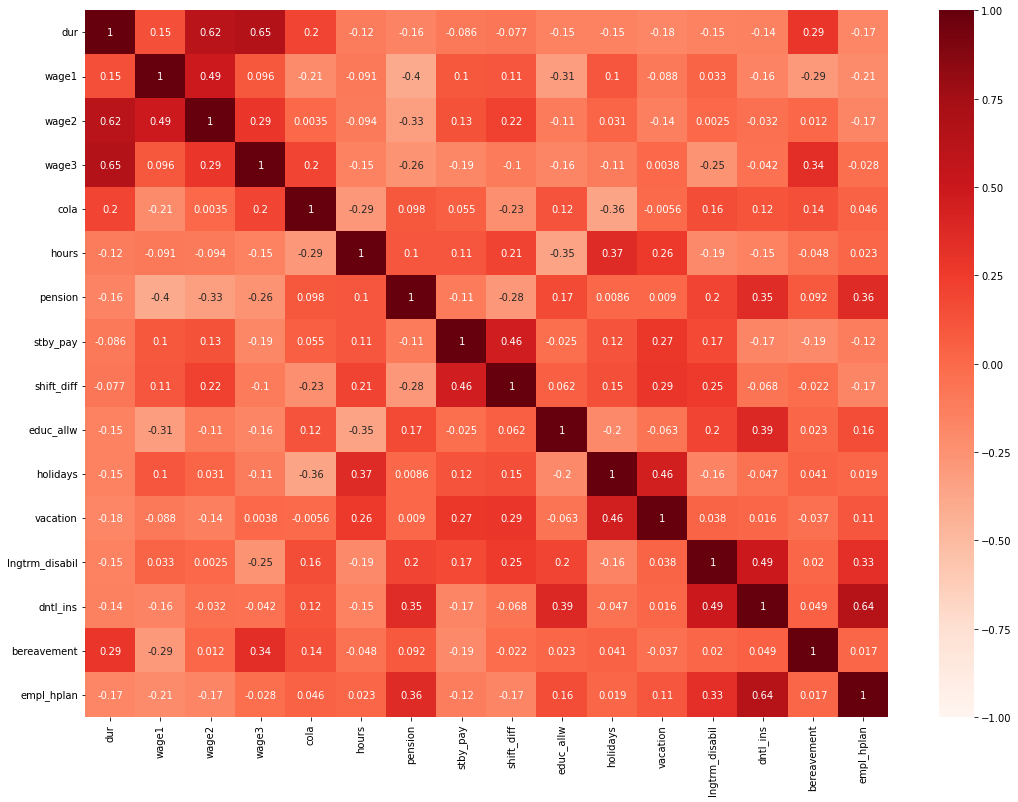

In [17]:
df_labor_obj=df_labor_test_train.loc[:, df_labor_test_train.dtypes == np.object]
cat_col_names_la=df_labor_obj.columns
lab_enc = LabelEncoder()

for feat in df_labor_obj:
    df_labor_test_train[feat] = lab_enc.fit_transform(df_labor_test_train[feat].astype(str))

X_labor=df_labor_test_train.drop(['target'],axis=1)
print(df_labor_test_train)
corr1 = X_labor.corr()
plt.figure(figsize=(18,13))
print("Heart Data Correlation matrix")
sns.heatmap(corr1, annot=True, vmin=-1,center=0,cmap="Reds")

In [18]:
# feature scaling :: labor data - label
std_scaler=StandardScaler()
X_labor=df_labor_test_train.drop(['target'],axis=1)
y_labor=df_labor_test_train['target']
scaled_labor = scaler.fit_transform(X_labor)
scaled_labor_final_ss=pd.DataFrame(scaled_labor,columns = X_labor.columns)
scaled_labor_final_ss

,dur,wage1,wage2,wage3,cola,hours,pension,stby_pay,shift_diff,educ_allw,holidays,vacation,lngtrm_disabil,dntl_ins,bereavement,empl_hplan
0,0.333333,0.714286,0.000000,0.000000,0.000000,1.000,0.000000,0.000000,0.08,0.0,0.733333,0.333333,0.0,0.000000,1.0,0.000000
1,0.666667,0.642857,0.828571,0.000000,0.000000,0.875,1.000000,0.000000,0.00,1.0,0.733333,0.666667,0.0,0.333333,0.0,0.333333
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.950,0.333333,0.000000,0.20,0.0,0.733333,1.000000,1.0,0.666667,1.0,0.666667
3,1.000000,0.528571,0.571429,0.980392,0.666667,0.000,0.000000,0.000000,0.00,1.0,0.000000,0.000000,0.0,0.000000,1.0,0.000000
4,1.000000,0.642857,0.642857,0.980392,0.000000,1.000,0.000000,0.000000,0.00,0.0,0.800000,0.333333,0.0,0.666667,1.0,0.666667
5,0.666667,0.285714,0.357143,0.000000,0.000000,0.875,0.000000,0.000000,0.24,1.0,0.800000,0.333333,0.0,0.000000,0.0,0.000000
6,1.000000,0.571429,0.714286,0.980392,0.666667,0.000,0.333333,0.000000,0.00,0.0,0.800000,1.000000,1.0,1.000000,1.0,0.666667
7,1.000000,0.985714,0.685714,0.450980,0.000000,1.000,0.000000,0.000000,0.12,0.0,0.800000,0.666667,0.0,0.000000,0.0,0.000000
8,0.666667,0.428571,1.000000,0.000000,0.000000,0.950,0.000000,0.857143,1.00,1.0,0.733333,0.666667,1.0,0.666667,1.0,0.000000
9,0.333333,0.814286,0.000000,0.000000,0.333333,1.000,0.333333,0.000000,0.16,0.0,0.733333,1.000000,1.0,0.333333,0.0,0.000000


In [19]:
# feature scaling :: labor data - with onehot 
X_labor=encoded_labor.drop(['target'],axis=1)
y_labor=encoded_labor['target']
scaled_labor = scaler.fit_transform(X_labor)
scaled_labor_final_ohe=pd.DataFrame(scaled_labor,columns = X_labor.columns)
scaled_labor_final_ohe

,dur,wage1,wage2,wage3,cola_1,cola_2,cola_3,cola_4,hours,pension_1,...,dntl_ins_2,dntl_ins_3,dntl_ins_4,bereavement_1,bereavement_2,bereavement_3,empl_hplan_1,empl_hplan_2,empl_hplan_3,empl_hplan_4
0,0.333333,0.714286,0.000000,0.000000,1.0,0.0,0.0,0.0,1.000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.666667,0.642857,0.828571,0.000000,1.0,0.0,0.0,0.0,0.875,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.950,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.000000,0.528571,0.571429,0.980392,0.0,1.0,0.0,0.0,0.000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.000000,0.642857,0.642857,0.980392,1.0,0.0,0.0,0.0,1.000,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.666667,0.285714,0.357143,0.000000,1.0,0.0,0.0,0.0,0.875,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,1.000000,0.571429,0.714286,0.980392,0.0,1.0,0.0,0.0,0.000,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.000000,0.985714,0.685714,0.450980,1.0,0.0,0.0,0.0,1.000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8,0.666667,0.428571,1.000000,0.000000,1.0,0.0,0.0,0.0,0.950,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.333333,0.814286,0.000000,0.000000,0.0,0.0,1.0,0.0,1.000,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [20]:
#feature selection :::: labor data
col_names=scaled_labor_final_ss.columns
fval_selector=SelectKBest(f_classif,k=14)
x_kbest=fval_selector.fit_transform(scaled_labor_final_ss,y_labor)
x_kbest.size
x_kbest.shape
filter = fval_selector.get_support()
X_labor_inputs = pd.DataFrame(x_kbest, columns=col_names[filter])
print(X_labor_inputs)
print(y_labor)

         dur     wage1     wage2     wage3      cola  hours   pension  \
0   0.333333  0.714286  0.000000  0.000000  0.000000  1.000  0.000000   
1   0.666667  0.642857  0.828571  0.000000  0.000000  0.875  1.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.950  0.333333   
3   1.000000  0.528571  0.571429  0.980392  0.666667  0.000  0.000000   
4   1.000000  0.642857  0.642857  0.980392  0.000000  1.000  0.000000   
5   0.666667  0.285714  0.357143  0.000000  0.000000  0.875  0.000000   
6   1.000000  0.571429  0.714286  0.980392  0.666667  0.000  0.333333   
7   1.000000  0.985714  0.685714  0.450980  0.000000  1.000  0.000000   
8   0.666667  0.428571  1.000000  0.000000  0.000000  0.950  0.000000   
9   0.333333  0.814286  0.000000  0.000000  0.333333  1.000  0.333333   
10  1.000000  0.500000  0.571429  0.901961  0.333333  0.900  0.000000   
11  0.666667  0.914286  0.914286  0.000000  0.000000  0.950  0.000000   
12  0.666667  0.500000  0.571429  0.000000  0.33333

In [49]:
#k fold for dataset D, DB1 and DB2
kf = KFold(n_splits=10, random_state=None) 
x_d_input_arr=X_d_inputs.to_numpy()
for train_index, test_index in kf.split(x_d_input_arr):
      print("Train:", train_index, "validation/test:",test_index)
      X_train, X_test = x_d_input_arr[train_index], x_d_input_arr[test_index] 
      y_train, y_test = y_d[train_index], y_d[test_index]
      X_under, y_under = undersampler.fit_resample(X_train, y_train)
      X_over, y_over = oversampler.fit_resample(X_train, y_train)
      #breakq
      
print('under')
print(pd.DataFrame(X_under,columns=X_d_inputs.columns))
print(pd.DataFrame(y_under))
print('train')
print(pd.DataFrame(X_train,columns=X_d_inputs.columns))
print(pd.DataFrame(y_train))
print('over')
print(pd.DataFrame(X_over,columns=X_d_inputs.columns))
print(pd.DataFrame(y_over))


Train: [ 189  190  191 ... 1882 1883 1884] validation/test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188]
Train: [   0    1    2 ... 1882 1883 1884] validation/test: [189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 21

In [41]:
# k fold heart data
X_heart_input_arr=X_heart_inputs.to_numpy()
for train_index, test_index in kf.split(X_heart_input_arr):
      print("Train:", train_index, "Validation/Test:",test_index)
      X_train_heart, X_test_heart = X_heart_input_arr[train_index], X_heart_input_arr[test_index] 
      y_train_heart, y_test_heart = y_heart[train_index], y_heart[test_index]
      #break
print('train:heart')
print(pd.DataFrame(X_train_heart,columns=X_heart_inputs.columns))
print(pd.DataFrame(y_train_heart))


Train: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274

In [26]:
# k fold labor data
kf2 = KFold(n_splits=10, random_state=None, shuffle=True) 
X_labor_input_arr=X_labor_inputs.to_numpy()
for train_index, test_index in kf.split(X_labor_input_arr):
      print("Train:", train_index, "Validation/Test:",test_index)
      X_train_labor, X_test_labor = X_labor_input_arr[train_index], X_labor_input_arr[test_index] 
      y_train_labor, y_test_labor = y_labor[train_index], y_labor[test_index]
      #break
print('train:labor')
print(pd.DataFrame(X_train_labor,columns=X_labor_inputs.columns))
print(pd.DataFrame(y_train_labor))
print(pd.DataFrame(X_test_labor,columns=X_labor_inputs.columns))
print(pd.DataFrame(y_test_labor))

Train: [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56] Validation/Test: [0 1 2 3 4 5]
Train: [ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56] Validation/Test: [ 6  7  8  9 10 11]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56] Validation/Test: [12 13 14 15 16 17]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56] Validation/Test: [18 19 20 21 22 23]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56] Validation/Test: [24 25 26 27 28 29]
T

In [27]:
scoring = 'accuracy'

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }},
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }},
    'decision_tree' : {
        'model': tree.DecisionTreeClassifier(),
        'params': {
              'criterion' : ['gini', 'entropy'],
        }},
    'knn_classifier' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]
        }},
   'gb_classifier' : {
        'model': GradientBoostingClassifier(),
        'params': {
              'criterion': ["friedman_mse",  "mae"],
              'loss':["deviance","exponential"],
              'max_features':["log2","sqrt"],
              'learning_rate': [0.05,0.1,1,0.5],
              'max_depth': [3,4,5],
              'subsample': [0.6,0.7,0.8],
              'n_estimators': [5,10,15,20]
        }},
    'mlp_classifier' : {
        'model': MLPClassifier(),
        'params': {
             'max_iter':[1200,1300],
              'activation': ['tanh', 'relu'],
             'solver': ['sgd', 'adam'],
            'learning_rate': ['constant','adaptive']
        }}
   }

In [64]:
scores=[]
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append(
        {
        'models': model_name,
        'best_scores': clf.best_score_,
        'best_parameters': clf.best_params_
  }
)
    
df_d_hyp = pd.DataFrame(scores,columns=['models','best_scores','best_parameters'])
print(df_d_hyp)
path = '/content/drive/My Drive/hyperparams_d.csv'
df.to_csv(path, encoding='utf-8')

           models  best_scores  \
0             svm     0.892753   
1   random_forest     0.865050   
2   decision_tree     0.819092   
3  knn_classifier     0.888051   
4   gb_classifier     0.896881   
5  mlp_classifier     0.893944   

                                     best_parameters  
0                          {'C': 1, 'kernel': 'rbf'}  
1                                {'n_estimators': 5}  
2                           {'criterion': 'entropy'}  
3                                {'n_neighbors': 15}  
4  {'criterion': 'friedman_mse', 'learning_rate':...  
5  {'activation': 'tanh', 'learning_rate': 'const...  


In [65]:
#DB1 hyperparams
scores_db1=[]
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_under, y_under)
    scores_db1.append({
        'models': model_name,
        'best_scores': clf.best_score_,
        'best_parameters': clf.best_params_
  }
)
df_db1_hyp = pd.DataFrame(scores_db1,columns=['models','best_scores','best_parameters'])
print(df_db1_hyp)
path = '/content/drive/My Drive/hyperparams_db1.csv'
df_db1_hyp.to_csv(path, encoding='utf-8')

           models  best_scores  \
0             svm     0.743018   
1   random_forest     0.715090   
2   decision_tree     0.654655   
3  knn_classifier     0.745796   
4   gb_classifier     0.748874   
5  mlp_classifier     0.745946   

                                     best_parameters  
0                       {'C': 1, 'kernel': 'linear'}  
1                               {'n_estimators': 10}  
2                           {'criterion': 'entropy'}  
3                                 {'n_neighbors': 9}  
4  {'criterion': 'friedman_mse', 'learning_rate':...  
5  {'activation': 'tanh', 'learning_rate': 'const...  


In [66]:
#DB2 hyperparams
scores_db2=[]

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_over, y_over)
    scores_db2.append({
        'models': model_name,
        'best_scores': clf.best_score_,
        'best_parameters': clf.best_params_
  }
)
df_db2_hyp = pd.DataFrame(scores_db2,columns=['models','best_scores','best_parameters'])
print(df_db2_hyp)
path = '/content/drive/My Drive/hyperparams_db2.csv'
df_db2_hyp.to_csv(path, encoding='utf-8')

           models  best_scores  \
0             svm     0.733993   
1   random_forest     0.951485   
2   decision_tree     0.948185   
3  knn_classifier     0.946205   
4   gb_classifier     0.934983   
5  mlp_classifier     0.778878   

                                     best_parameters  
0                         {'C': 20, 'kernel': 'rbf'}  
1                                {'n_estimators': 5}  
2                              {'criterion': 'gini'}  
3                                 {'n_neighbors': 1}  
4  {'criterion': 'friedman_mse', 'learning_rate':...  
5  {'activation': 'relu', 'learning_rate': 'const...  


In [67]:
#Heart data hyperparams
scores_heart=[]
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train_heart, y_train_heart)
    scores_heart.append({
        'models': model_name,
        'best_scores': clf.best_score_,
        'best_parameters': clf.best_params_
  }
)
df_heart_hyp = pd.DataFrame(scores_heart,columns=['models','best_scores','best_parameters'])
print(df_heart_hyp)
path = '/content/drive/My Drive/hyperparams_heart.csv'
df_heart_hyp.to_csv(path, encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

           models  best_scores  \
0             svm     0.846866   
1   random_forest     0.791168   
2   decision_tree     0.742165   
3  knn_classifier     0.832194   
4   gb_classifier     0.850712   
5  mlp_classifier     0.850285   

                                     best_parameters  
0                       {'C': 1, 'kernel': 'linear'}  
1                                {'n_estimators': 5}  
2                           {'criterion': 'entropy'}  
3                                 {'n_neighbors': 7}  
4  {'criterion': 'mae', 'learning_rate': 0.05, 'l...  
5  {'activation': 'tanh', 'learning_rate': 'adapt...  


In [47]:
#labor data hyperparams

scores_labor=[]
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train_labor, y_train_labor)
    scores_labor.append({
        'models': model_name,
        'best_scores': clf.best_score_,
        'best_parameters': clf.best_params_
  }
)
df_labor_hyp = pd.DataFrame(scores_labor,columns=['models','best_scores','best_parameters'])
print(df_labor_hyp)
path = '/content/drive/My Drive/hyperparams_labor.csv'
df_labor_hyp.to_csv(path, encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

           models  best_scores  \
0             svm     0.813333   
1   random_forest     0.906667   
2   decision_tree     0.830000   
3  knn_classifier     0.830000   
4   gb_classifier     0.980000   
5  mlp_classifier     0.906667   

                                     best_parameters  
0                         {'C': 10, 'kernel': 'rbf'}  
1                               {'n_estimators': 10}  
2                              {'criterion': 'gini'}  
3                                 {'n_neighbors': 1}  
4  {'criterion': 'friedman_mse', 'learning_rate':...  
5  {'activation': 'relu', 'learning_rate': 'const...  


In [34]:
#models after hyperparameter tuning
dt_d=tree.DecisionTreeClassifier(criterion='entropy')
rf_d=RandomForestClassifier(n_estimators=5)
svm_d=svm.SVC(C= 1, kernel='rbf')
knn_d=KNeighborsClassifier(n_neighbors= 15)
mlp_d=MLPClassifier(activation= 'tanh', learning_rate= 'adaptive', max_iter= 1000, solver= 'adam')
gb_d=GradientBoostingClassifier(criterion='mae', learning_rate= 0.5,  loss='exponential', max_depth= 4, max_features= 'sqrt', n_estimators= 20, subsample= 0.6)
models_d=[dt_d,rf_d,svm_d,knn_d,mlp_d,gb_d]
accuracies_d=[]
for m in models_d:
  m.fit(X_train, y_train)
  acc = accuracy_score(y_test, m.predict(X_test))
  accuracies_d.append(acc)
print(accuracies_d)

[0.7393617021276596, 0.7712765957446809, 0.8404255319148937, 0.8351063829787234, 0.8031914893617021, 0.7606382978723404]


In [35]:
dt_d1=tree.DecisionTreeClassifier(criterion='entropy')
rf_d1=RandomForestClassifier(n_estimators=5)
svm_d1=svm.SVC(C= 1, kernel='rbf')
knn_d1=KNeighborsClassifier(n_neighbors= 17)
mlp_d1=MLPClassifier(activation= 'relu', learning_rate= 'adaptive', max_iter= 1200, solver= 'adam')
gb_d1=GradientBoostingClassifier(criterion='mae', learning_rate= 0.1, loss='exponential', max_depth= 4, max_features= 'log2', n_estimators= 20, subsample= 0.6)
models_d1=[dt_d1,rf_d1,svm_d1,knn_d1,mlp_d1,gb_d1]
accuracies_d1=[]
for m in models_d1:
  m.fit(X_over, y_over)
  acc = accuracy_score(y_test, m.predict(X_test))
  accuracies_d1.append(acc)
print(accuracies_d1)

[0.7021276595744681, 0.7553191489361702, 0.5425531914893617, 0.601063829787234, 0.5425531914893617, 0.5638297872340425]


In [36]:
dt_d2=tree.DecisionTreeClassifier(criterion='entropy')
rf_d2=RandomForestClassifier(n_estimators=5)
svm_d2=svm.SVC(C= 1, kernel='rbf')
knn_d2=KNeighborsClassifier(n_neighbors= 17)
mlp_d2=MLPClassifier(activation= 'relu', learning_rate= 'adaptive', max_iter= 1200, solver= 'adam')
gb_d2=GradientBoostingClassifier(criterion='mae', learning_rate= 0.1, loss='exponential', max_depth= 4, max_features= 'log2', n_estimators= 20, subsample= 0.6)
models_d2=[dt_d2,rf_d2,svm_d2,knn_d2,mlp_d2,gb_d2]
accuracies_d2=[]
for m in models_d2:
  m.fit(X_under, y_under)
  acc = accuracy_score(y_test, m.predict(X_test))
  accuracies_d2.append(acc)
print(accuracies_d2)

[0.574468085106383, 0.5159574468085106, 0.5, 0.5053191489361702, 0.5, 0.526595744680851]


In [42]:
dt_he=tree.DecisionTreeClassifier(criterion='gini')
rf_he=RandomForestClassifier(n_estimators=5)
svm_he=svm.SVC(C= 20, kernel='linear')
knn_he=KNeighborsClassifier(n_neighbors= 17)
mlp_he=MLPClassifier(activation= 'tanh', learning_rate= 'adaptive', max_iter= 1200, solver= 'adam')
gb_he=GradientBoostingClassifier(criterion='friedman_mse', learning_rate= 0.5, loss='exponential', max_depth= 3, max_features= 'log2', n_estimators= 10, subsample= 0.7)
models_he=[dt_he,rf_he,svm_he,knn_he,mlp_he,gb_he]
accuracies_he=[]
for m in models_he:
  m.fit(X_train_heart, y_train_heart)
  acc = accuracy_score(y_test_heart, m.predict(X_test_heart))
  accuracies_he.append(acc)
print(accuracies_he)

[0.6551724137931034, 0.6896551724137931, 0.8275862068965517, 0.7931034482758621, 0.7931034482758621, 0.7931034482758621]


In [52]:
dt_la=tree.DecisionTreeClassifier(criterion='entropy')
rf_la=RandomForestClassifier(n_estimators=10)
svm_la=svm.SVC(C= 10, kernel='rbf')
knn_la=KNeighborsClassifier(n_neighbors= 5)
mlp_la=MLPClassifier(activation= 'relu', alpha=0.0001,learning_rate= 'adaptive', max_iter= 1600, solver= 'sgd')
gb_la=GradientBoostingClassifier(criterion='mae', learning_rate= 0.5, loss='exponential', max_depth= 5, max_features= 'sqrt', n_estimators= 20, subsample= 0.7)
models_la=[dt_la,rf_la,svm_la,knn_la,mlp_la,gb_la]
accuracies_la=[]
for m in models_la:
  m.fit(X_train_labor, y_train_labor)
  acc = accuracy_score(y_test_labor, m.predict(X_test_labor))
  accuracies_la.append(acc)
print(accuracies_la)

[0.8, 1.0, 0.8, 1.0, 1.0, 1.0]


In [43]:
array1 = np.array([accuracies_d, accuracies_d1, accuracies_d2, accuracies_he, accuracies_la])
   
model_names=['DT','RF','SVM','KNN','MLP','GBC']

index_val = ['D', 'DB1', 'DB2', 'Heart Data','Labor Data']

df_acc_table = pd.DataFrame(data = array1, index = index_val, columns = model_names)

df_acc_table

,DT,RF,SVM,KNN,MLP,GBC
D,0.739362,0.771277,0.840426,0.835106,0.803191,0.760638
DB1,0.702128,0.755319,0.542553,0.601064,0.542553,0.563830
DB2,0.574468,0.515957,0.500000,0.505319,0.500000,0.526596
Heart Data,0.655172,0.689655,0.827586,0.793103,0.793103,0.793103
Labor Data,0.800000,1.000000,0.800000,1.000000,1.000000,1.000000


In [46]:
path = '/content/drive/My Drive/results_a2.csv'
df_acc_table.to_csv(path, encoding='utf-8')

In [44]:
# friedman test

friedmanchisquare(df_acc_table['DT'], df_acc_table['RF'], df_acc_table['SVM'],df_acc_table['KNN'],df_acc_table['MLP'],df_acc_table['GBC'])


FriedmanchisquareResult(statistic=1.7721518987341711, pvalue=0.879687394147093)

In [45]:
# Nemenyi post-hoc test

data_nementi = np.array([df_acc_table['DT'], df_acc_table['RF'], df_acc_table['SVM'],df_acc_table['KNN'],df_acc_table['MLP'],df_acc_table['GBC']]) 
sp.posthoc_nemenyi_friedman(data_nementi.T, group_col=df_acc_table.columns)


,0,1,2,3,4,5
0,1.0,0.9,0.9,0.9,0.9,0.9
1,0.9,1.0,0.9,0.9,0.9,0.9
2,0.9,0.9,1.0,0.9,0.9,0.9
3,0.9,0.9,0.9,1.0,0.9,0.9
4,0.9,0.9,0.9,0.9,1.0,0.9
5,0.9,0.9,0.9,0.9,0.9,1.0
